Target (booking status): whether the booking was cancelled or not

feature (lead_time): difference of days betweeen the reservation date and the arrival day.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.describe()

,Unnamed: 0,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000
mean,18129.429256,1.844280,0.106306,0.807822,2.202068,0.031943,85.376085,2017.820434,7.416506,15.598725,0.025775,0.023880,0.154721,103.501785,0.619917
std,10454.722172,0.518692,0.405391,0.868111,1.402801,0.175853,85.859070,0.383832,3.060058,8.740151,0.158467,0.375994,1.777787,35.137794,0.786348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9111.750000,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.500000,0.000000
50%,18108.500000,2.000000,0.000000,1.000000,2.000000,0.000000,58.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.850000,0.000000
75%,27157.500000,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.120000,1.000000
max,36273.000000,4.000000,10.000000,6.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000


In [17]:
df.groupby(['repeated_guest','booking_status'])['no_of_previous_cancellations'].count()

repeated_guest  booking_status
0               Canceled           9457
                Not_Canceled      18815
1               Canceled             12
                Not_Canceled        736
Name: no_of_previous_cancellations, dtype: int64

In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

In [19]:
df.shape

(29020, 18)

In [20]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(7661)

In [7]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(21359, 18)

## EDA

In [8]:
df.no_of_adults.value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [16]:
df.no_of_children.value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [17]:
df.no_of_weekend_nights.value_counts()

no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64

In [18]:
df.no_of_week_nights.value_counts()

no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64

In [28]:
df.type_of_meal_plan.value_counts()

type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64

Most of them reserved for Meal plan 1.<br>
 3627 Not specified the meal plan at the time of reservation maybe will order at the hotel.

In [20]:
df.required_car_parking_space.value_counts()

required_car_parking_space
0    20452
1      907
Name: count, dtype: int64

In [29]:
df.repeated_guest.value_counts()

repeated_guest
0    20667
1      692
Name: count, dtype: int64

In [21]:
df.room_type_reserved.value_counts()

room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64

In [23]:
df.arrival_year.value_counts()

arrival_year
2018    18141
2017     3218
Name: count, dtype: int64

Data is from the year 2017 and 2018

In [24]:
df.arrival_month.value_counts()

arrival_month
10    2663
9     2525
8     2477
12    1928
7     1893
11    1817
4     1695
3     1611
6     1543
5     1522
2     1067
1      618
Name: count, dtype: int64

In Spring and Winter season there are more bookings (8,9,10,11,12) or it also denotes festive seasons there are more bookings.

In [25]:
df.market_segment_type.value_counts()

market_segment_type
Online           16324
Offline           3471
Corporate         1192
Complementary      291
Aviation            81
Name: count, dtype: int64

In [27]:
df.no_of_previous_cancellations.value_counts()

no_of_previous_cancellations
0     21135
1       115
2        36
3        32
11       20
5        10
4         9
13        1
6         1
Name: count, dtype: int64

In [33]:
df.booking_status.value_counts()/len(df) *100

booking_status
Not_Canceled    71.309518
Canceled        28.690482
Name: count, dtype: float64

**our data is imalanced but not so extreme**

In [8]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

### Data analysis

In [30]:
data = df.copy()

#### Univariate analysis

In [35]:
def num_plot_dist(df, num_features):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))

    if len(num_features) == 1:
        axes = np.array([axes])

    for i, col in enumerate(num_features):
        sns.kdeplot(data=df, x=col, ax=axes[i][0], fill=True, color='skyblue')
        axes[i][0].set_title(f"KDE Plot for {col}")

        sns.violinplot(data=df, x=col, ax=axes[i][1], color='darkblue')
        axes[i][1].set_title(f"Violin Plot for {col}")

    plt.tight_layout()
    plt.show()


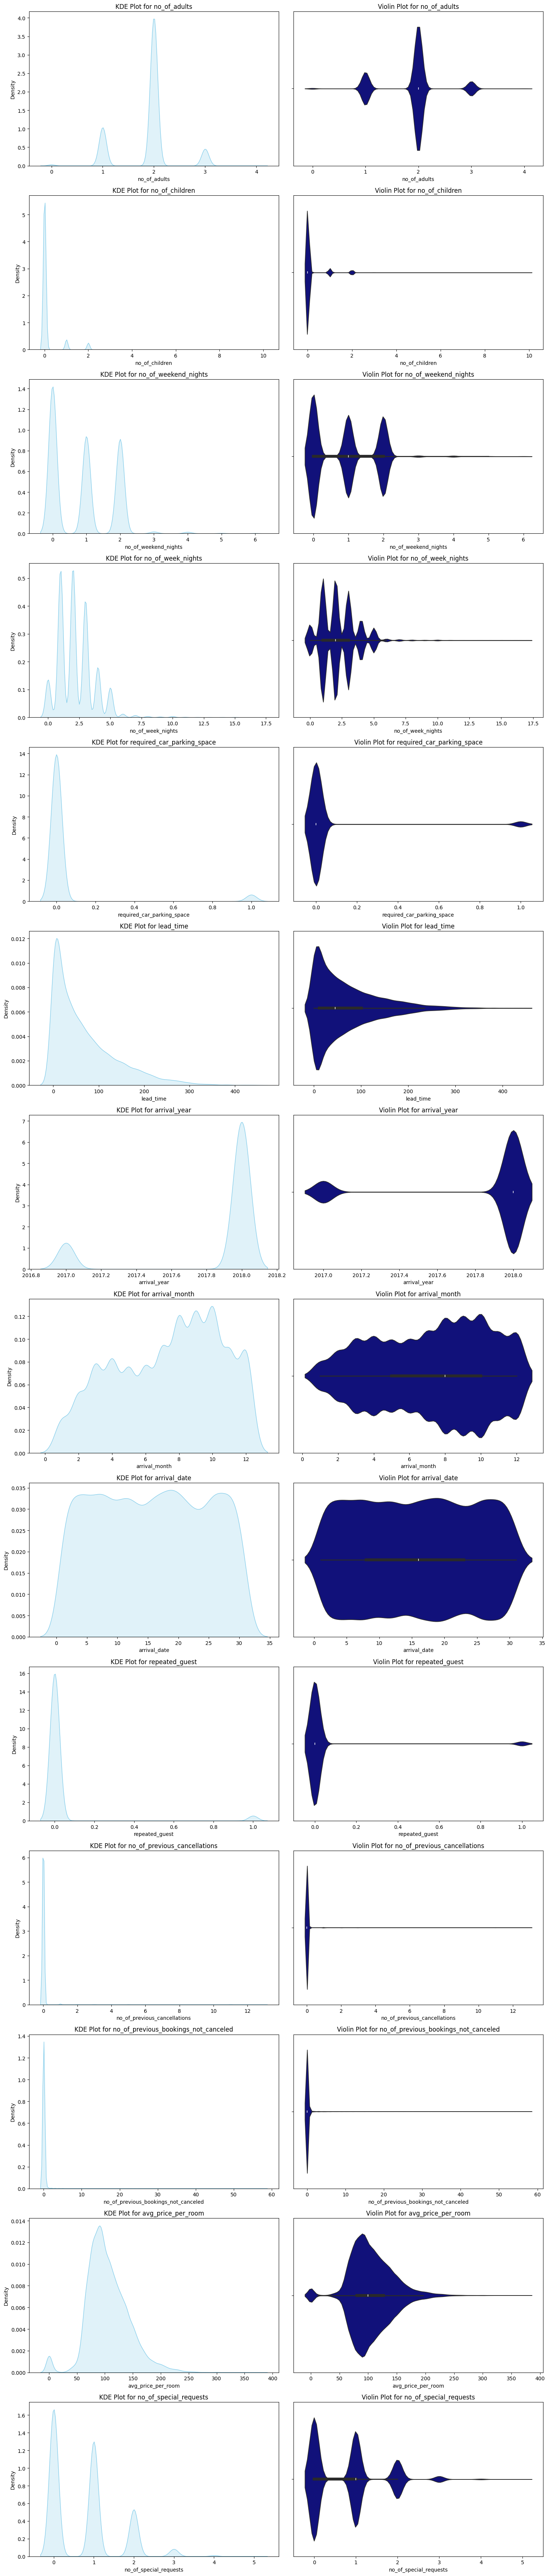

In [36]:
num_plot_dist(data, num_cols)

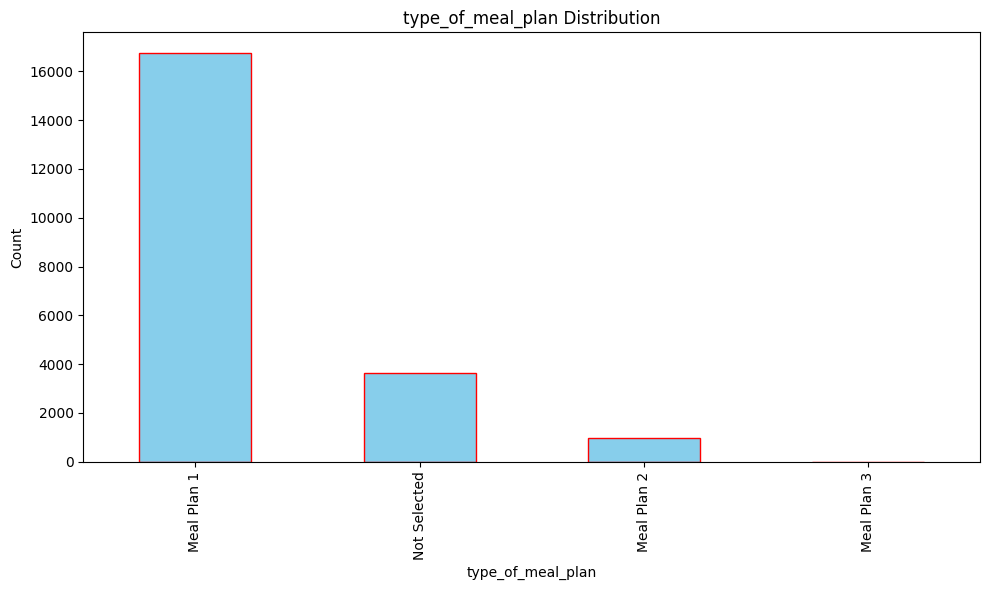

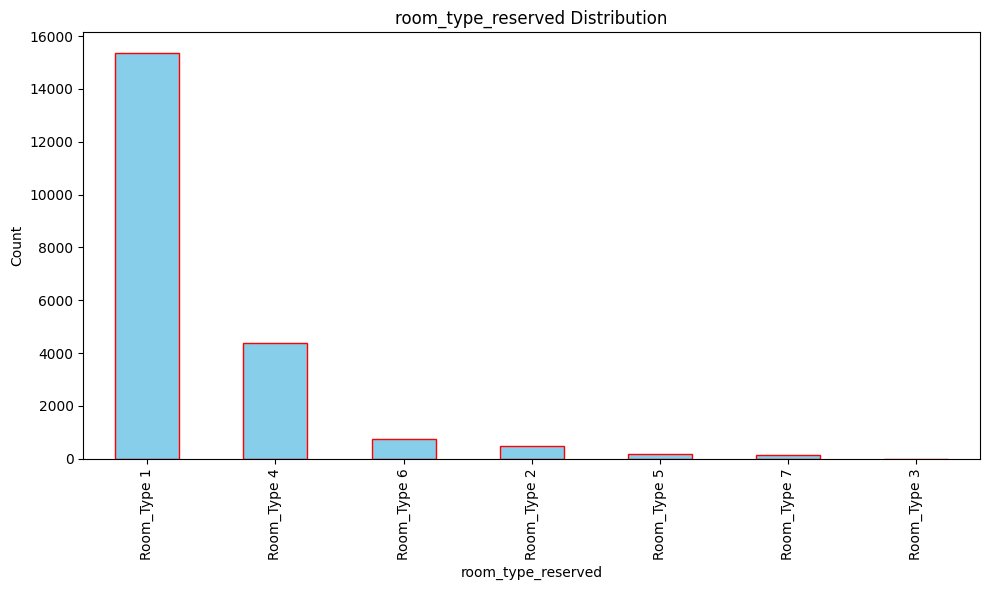

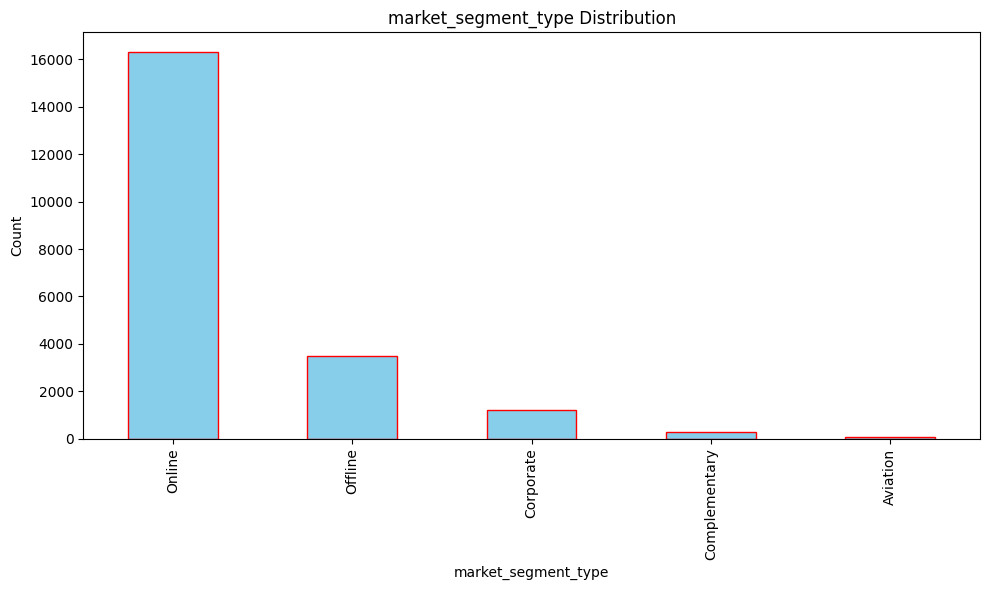

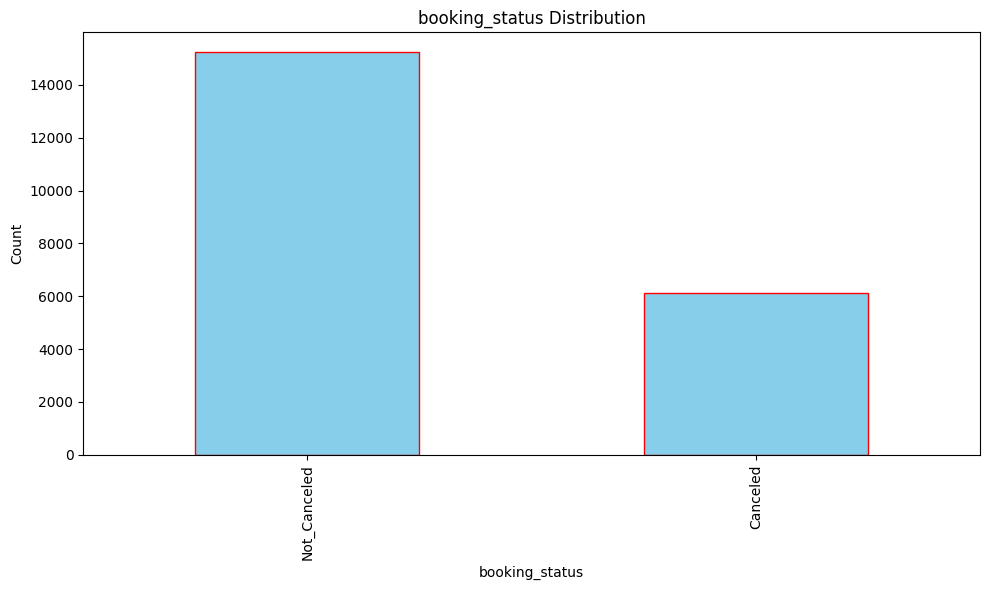

In [35]:
for cat_features in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_features].value_counts().plot(
        kind='bar',
        color='skyblue',
        edgecolor='red'  # Adds the dark blue outline
    )
    plt.title(f"{cat_features} Distribution")
    plt.xlabel(cat_features)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

### Bivariate Analyis

In [36]:
sns.set_style('darkgrid')
def plot_bivariate_num(df, target, num_features):
   num_plots = len(num_features)
   num_rows = (num_plots+1) // 2

   fig, axes = plt.subplots(num_rows,2, figsize=(15,20))
   axes = axes.flatten()
   for i, col in enumerate(num_features):
    sns.barplot(x=target, y= col, ax= axes[i], data=df, palette='coolwarm')
    axes[i].set_title(f"{col} vs {target}")
   plt.tight_layout()
   plt.show()

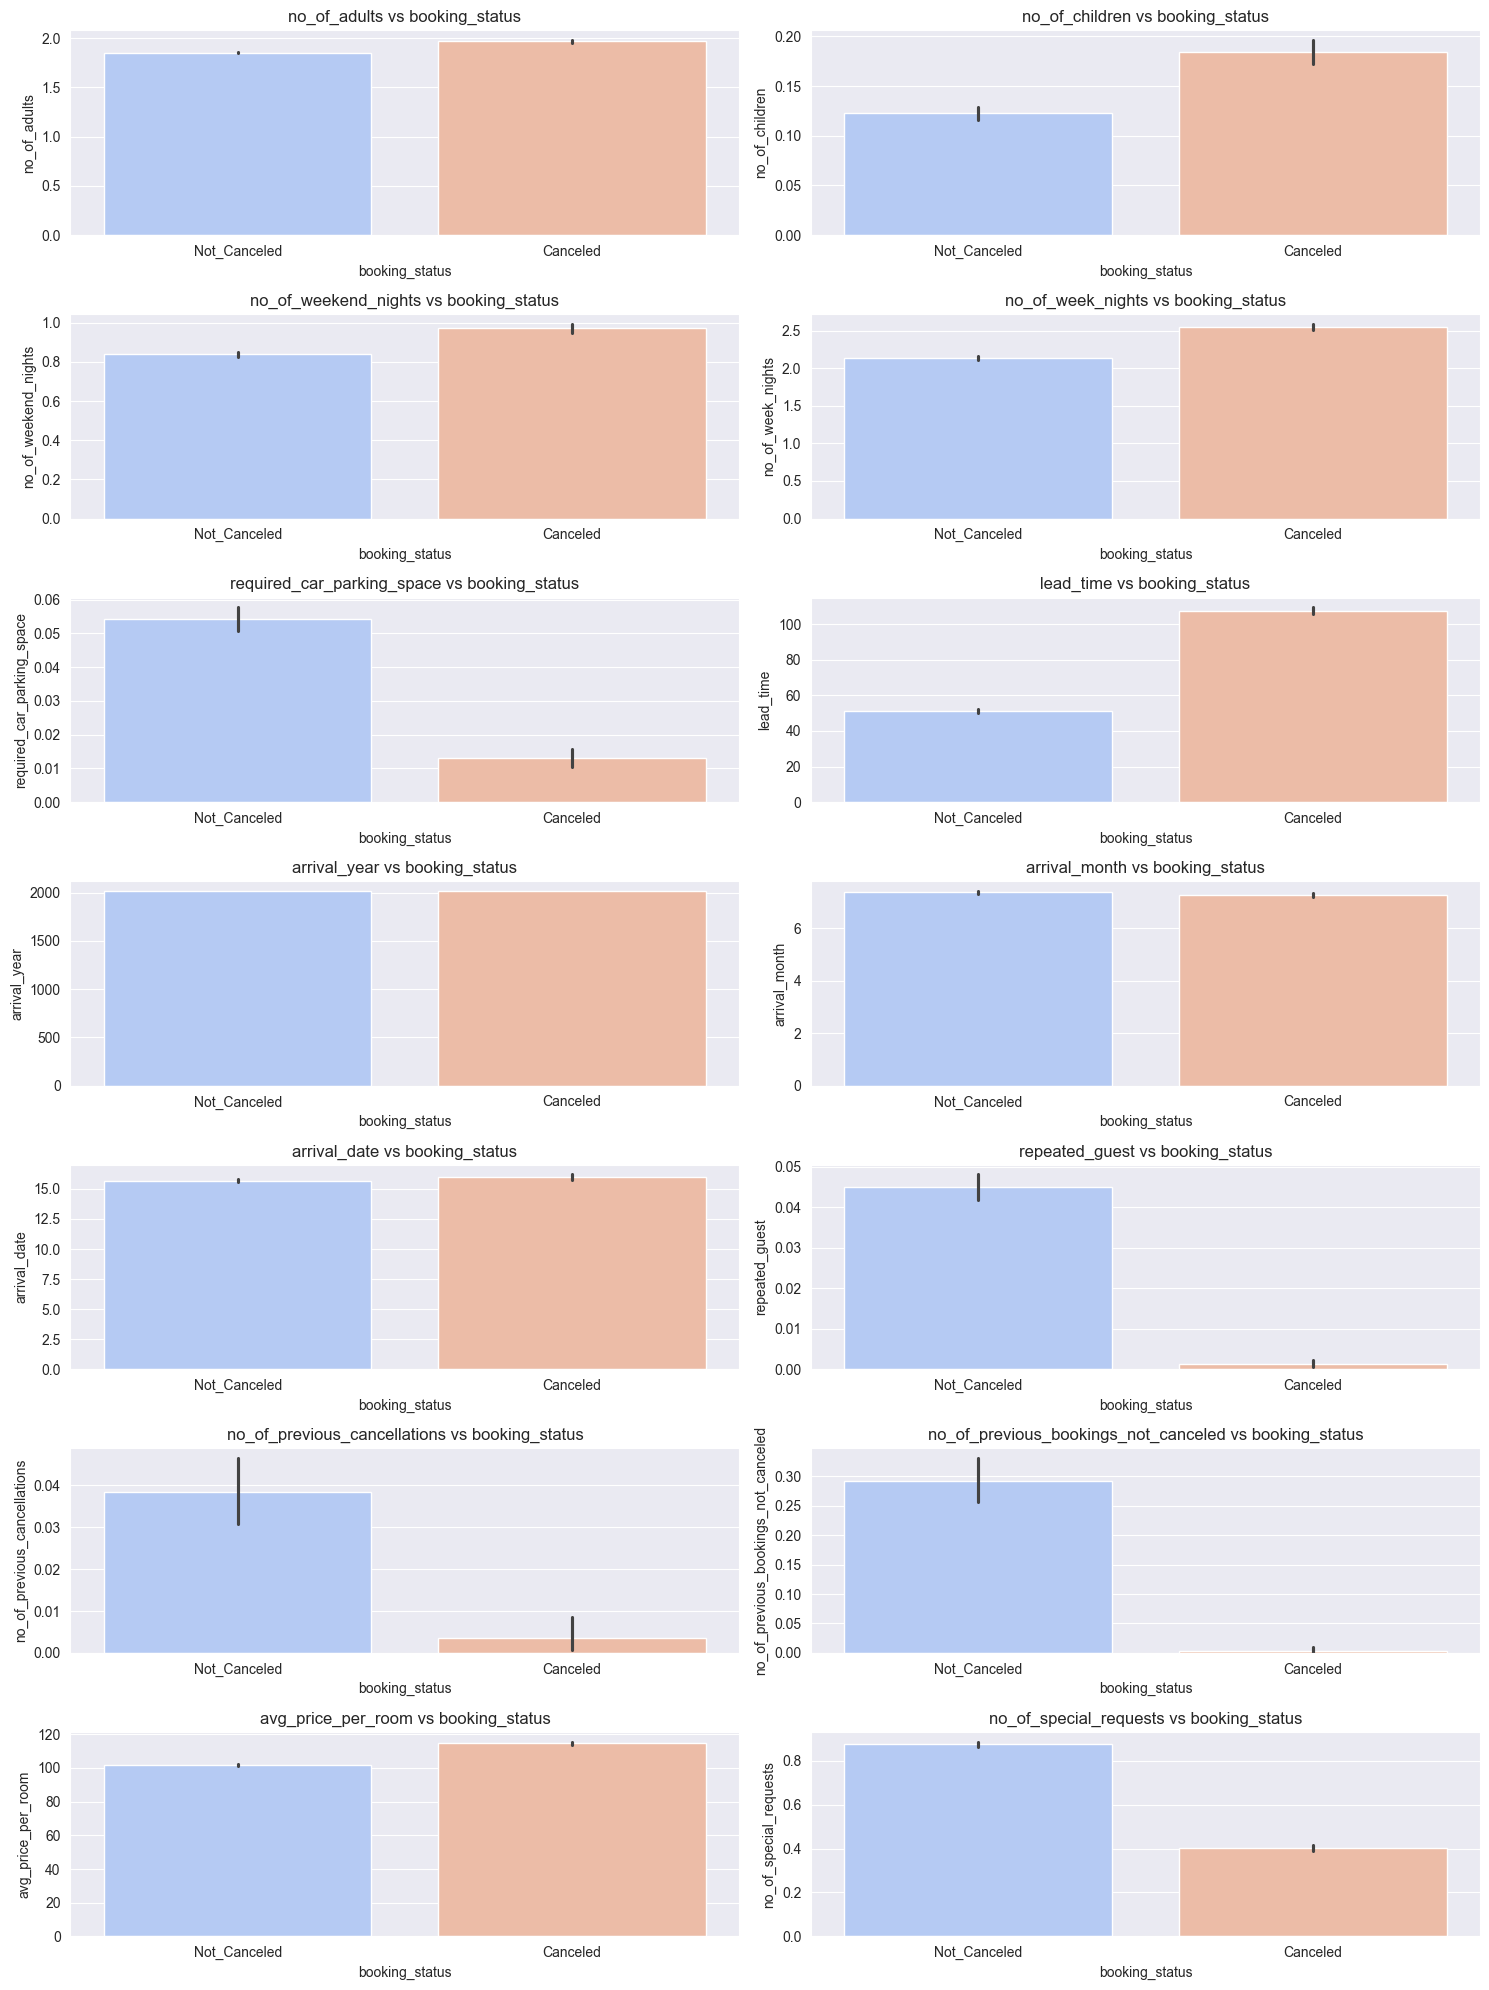

In [37]:
plot_bivariate_num(data, 'booking_status',num_cols)

Influence on target variable (booking status): when the Lead time is b/w 0 to 80 days chances of cancelling the booking is less but as soon as lead time increases around(100 days and more) chances of cancellation increases. <br>
Those who have more number of children makes more cancellation compare to those who have less.<br>
New guests cancels more frequently than repeated guest.
<br> If a person is opting for car parking space there is less chance he will cancel his reservation. 

<Axes: xlabel='arrival_month', ylabel='avg_price_per_room'>

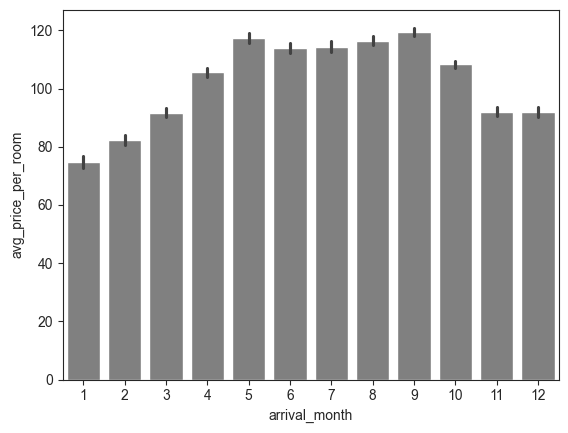

In [39]:
sns.set_style('ticks')
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data,color='grey')


 months in which there are more footfalls, prices of rooms are high whereas months with less frequency of reservation average price per room is kept at lower price to attractive customer and keep the business going. 

### Bivariate of categorical

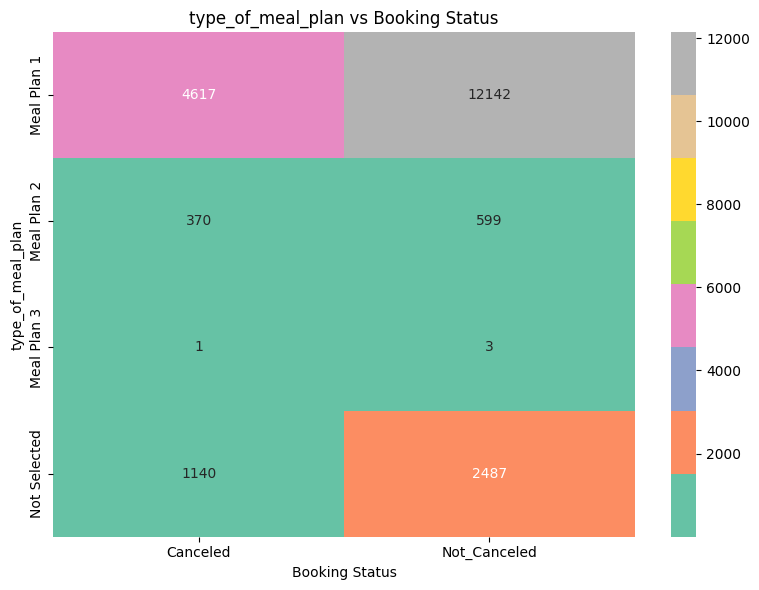

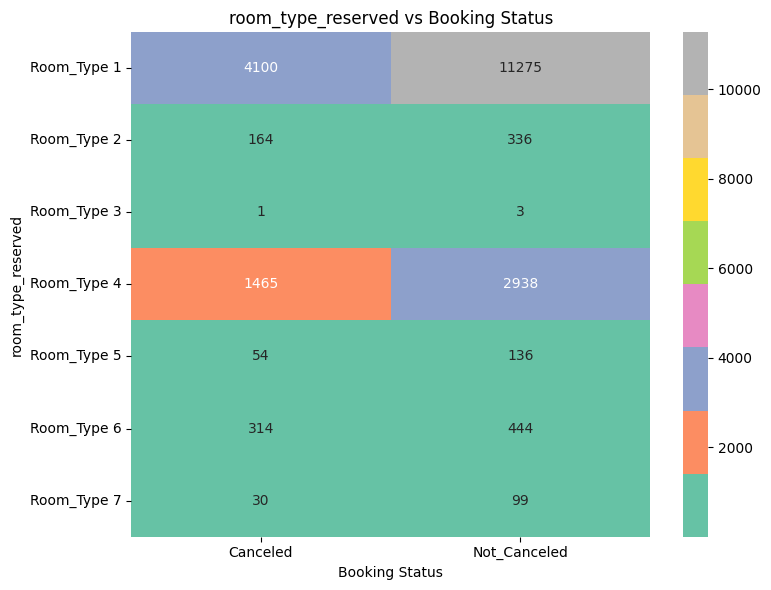

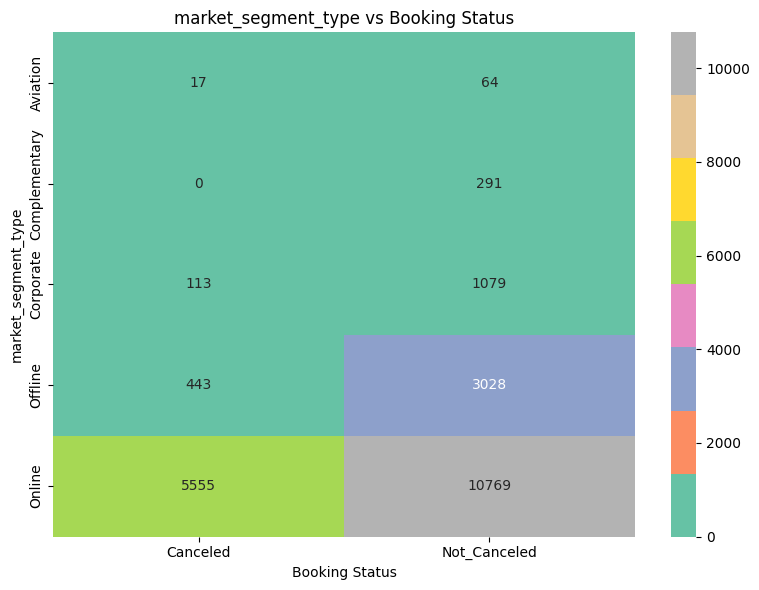

In [23]:

# List of your categorical features
cat_features = [i for i in cat_cols if i not in 'booking_status']   # replace with your actual column names

# Loop through each feature
for feature in cat_features:
    ct = pd.crosstab(df[feature], df['booking_status'])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(ct, annot=True, fmt='d', cmap='Set2')
    plt.title(f'{feature} vs Booking Status')
    plt.ylabel(feature)
    plt.xlabel('Booking Status')
    plt.tight_layout()
    plt.show()

## Data Processing

In [9]:
# label encoding

from sklearn.preprocessing import LabelEncoder


mapping so that we know what number is marked for what value

In [10]:
label_encoder = LabelEncoder()
mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label: code for label,code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}


In [11]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [12]:
df.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.0,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.5,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.0,0,0


In [13]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int32
required_car_parking_space                int64
room_type_reserved                        int32
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int32
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int32
dtype: object

#### Multicollinearity : Variance Inflation Factor (VIF)

In [12]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [14]:
X = add_constant(df)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [15]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


- VIF < 5: Generally considered acceptable. Little to no multicollinearity.
- VIF 5–10: Moderate multicollinearity. Could be worth investigating.
- VIF > 10: High multicollinearity. Consider removing or combining variables.<br>
Based on our data, we don’t have any severe multicollinearity.


Text(0.5, 1.0, 'Correlation Matrix - Heatmap')

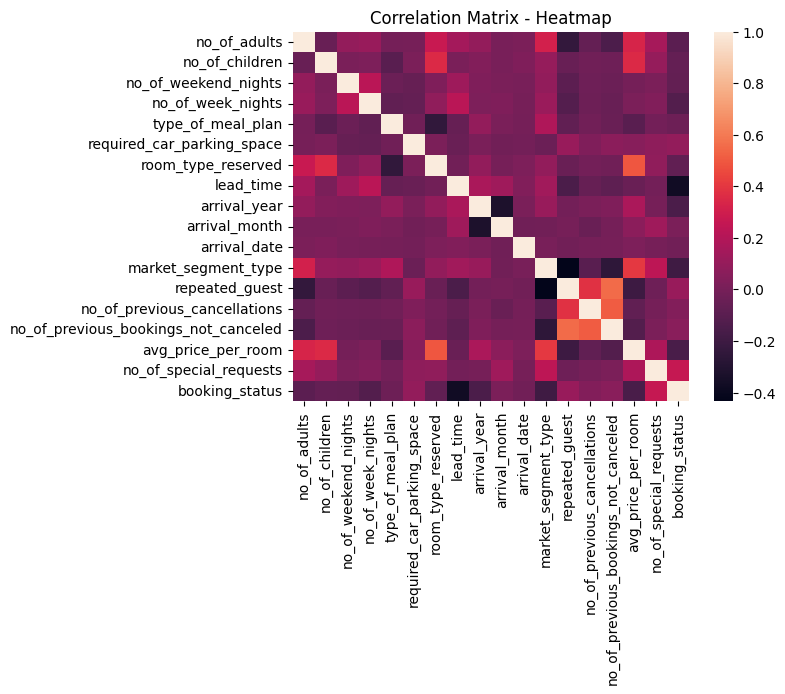

In [16]:
corr = df.corr()
plt.Figure(figsize=(12,10))
sns.heatmap(corr)
plt.title("Correlation Matrix - Heatmap")

In [56]:
#### Skweness

In [14]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

no_of_previous_cancellations            
no_of_previous_bookings_not_canceled are highly positively skewed. 

## Log transformation

In [15]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [16]:
skewnessN = df.skew()
skewnessN

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

#### SMOTE: oversampling (imbalanced dataset)

In [17]:
X = df.drop(columns='booking_status')
y = df.booking_status

In [18]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

Target: 0 <br>
'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [19]:
#%pip install imbalanced-learn

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y) # x and y resampling

In [23]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [24]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res

In [25]:
balanced_df.sample(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
23533,1,0,2,2,0,0,0,115,2018,2,27,3,0.0,0.0,0.0,60.279674,0,0
3712,1,0,2,2,3,0,0,207,2018,10,28,4,0.0,0.0,0.0,85.500000,0,0
4469,2,0,0,4,0,0,3,3,2018,2,16,4,0.0,0.0,0.0,106.000000,0,0


In [26]:
balanced_df.shape

(30462, 18)

In [27]:
df = balanced_df.copy()

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
X = df.drop(columns='booking_status')
y = df.booking_status

In [30]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [31]:
feature_importance = model.feature_importances_

In [32]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 
                                'importance':feature_importance })

In [35]:
top_feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
top_feature_importance_df

,Feature,importance
7,lead_time,0.260226
16,no_of_special_requests,0.183688
15,avg_price_per_room,0.150109
9,arrival_month,0.085296
10,arrival_date,0.084464
11,market_segment_type,0.057997
3,no_of_week_nights,0.044419
2,no_of_weekend_nights,0.030316
4,type_of_meal_plan,0.020648
6,room_type_reserved,0.020059


In [36]:
top_10_features = top_feature_importance_df['Feature'].head(10).values
top_10_df = df[top_10_features.tolist() + ['booking_status']]

In [37]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [40]:
len(top_10_df.columns)

11

In [41]:
df = top_10_df.copy()

### Model selection

In [43]:
!pip install xgboost lightgbm

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [46]:
X = df.drop(columns='booking_status')
y = df.booking_status

In [47]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [49]:
classifiers ={
    "Random_Forest": RandomForestClassifier(random_state=42),
    "Logistic_Regression": LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier" : SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naives bayes": GaussianNB(),
    "XGBoost" : XGBClassifier(random_state=42),
    "AdaBoostClassifier" : AdaBoostClassifier(random_state=42),
    "lightGBM" : LGBMClassifier(random_state=42)
    }

In [50]:
metrics ={
    "Model" :[],
    "Accuracy":[],
    "Precision": [],
    "Recall": [],
    "F1 score": []
}

In [51]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 score"].append(f1)


[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [52]:
metrics_df= pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 score
0,Random_Forest,0.891679,0.892508,0.892508,0.892508
1,Logistic_Regression,0.774331,0.802787,0.731922,0.765718
2,Gradient Boosting,0.837190,0.821473,0.864821,0.842590
3,Support Vector Classifier,0.720335,0.729657,0.706840,0.718068
4,Decision Tree,0.840801,0.850000,0.830619,0.840198
5,KNN,0.779419,0.856612,0.675244,0.755191
6,Naives bayes,0.773346,0.803232,0.728664,0.764133
7,XGBoost,0.870343,0.866324,0.878176,0.872210
8,AdaBoostClassifier,0.821927,0.814780,0.836808,0.825647
9,lightGBM,0.866732,0.851494,0.890879,0.870742


#### Train RandomForest Model

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# we will tell model we are giving u from this range to this range

In [55]:
rf = RandomForestClassifier()

In [56]:
params_dist ={
    'n_estimators': randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split':randint(2,10),
    'min_samples_leaf': randint(1,5),
    'bootstrap': [True, False]
} 

In [59]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=params_dist,
                                    n_iter=10, cv=3, verbose=2,
                                     random_state=42, scoring='f1')

In [60]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  21.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  12.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  18.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=199; total time=   7.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=199; total time=   8.8s
[CV

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C9E0349B90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C9E0349050>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C9E034AE10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C9DC01F150>},
                   random_state=42, scoring='f1', verbose=2)

In [61]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 413}

In [62]:
best_rf_model = random_search.best_estimator_

In [67]:
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [68]:
accuracy, precision, recall, f1

(0.8941408173313639,
 0.8935410580980201,
 0.8908794788273615,
 0.8951390017883271)

#### saving best model


In [69]:
import joblib 

In [70]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [71]:
loaded_model = joblib.load("random_forest.pkl")

In [72]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [83]:
new_data = np.array([190,1,93.5,9,8,4,5,2,0,0]).reshape(1,-1)

In [84]:
new_data_pred = loaded_model.predict(new_data)
new_data_pred

array([1])

In Final model selection will not use RF, XGBOOST, instead will use LightGBM because when we store it as pickle file its size is comparatively very less than other picklezied models.
<br> **and we are deloying the model in production (in a web server) there we will get charged for each and every MB, so we need a model of size as less as possibile**.